In [5]:
'''
DeepDA_verify is to verify DA output. 

It read proxy, prior, and posterior from DA outputs files and config file.
It calculates the statistics of the DA results and save the outputs.

By Mingsong Li
Penn State

2/17/2020
Updated Mar. 3. 2020
Updated Oct. 11, 2020  # plot enhanced
    for Monte Carlo simulations:
'''
import sys
sys.path.append('../')
from DeepDA_lib import modules_nc
from DeepDA_lib import DeepDA_psm
from scipy import stats
import shutil

import h5py
import yaml
import numpy as np
import pandas
import os
from netCDF4 import Dataset
from sys import platform as sys_pf
import matplotlib.pyplot as plt
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")
    import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
try:
    import bayspline
except ImportError as e1:
    print('Warning:', e1)
try:
    import bayspar
except ImportError as e2:
    print('Warning:', e2)
try:
    import bayfox
except ImportError as e3:
    print('Warning:', e3)
try:
    import baymag
except ImportError as e4:
    print('Warning:', e4)

print('>>  Import package => OKAY')
print('')
#####################    User defined start   #####################

#en = 'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_all_100mc'  # prePETM
#en2= 'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_all_100mc'  # peakPETM
#enid = [0,0]  # 0 = ind for en; 1 = ind for en2

#en = 'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc'
#en2 = 'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc'
#enid = [0,1]  # 0 = ind for en; 1 = ind for en2

#en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc'  # prePETM
#en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e100_100mc'  # peakPETM
#enid = [0,0]  # 0 = ind for en; 1 = ind for en2

# too much overlap
#en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc'  # prePETM
#en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc'  # peakPETM
#enid = [0,0]  # 0 = ind for en; 1 = ind for en2

# too hot?
#en = 'petmproxy3slices_v0.0.18hiatus.csv_petm17_v18h_2021011_ca_e100_100mc'  # prePETM
#en2= 'petmproxy3slices_v0.0.18hiatus.csv_petm18_v18h_2021011_ca_e400_100mc'  # peakPETM
#enid = [0,0]  # 0 = ind for en; 1 = ind for en2

# 
#en = 'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_ca_e100_100mc' # reasonable
#en2= 'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021011_ca_e400_100mc' # reasonable
#enid = [0,0]  # 0 = ind for en; 1 = ind for en2

# 
#en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc'  # prePETM
#en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e400_100mc'  # peakPETM
#enid = [0,0]  # 0 = ind for en; 1 = ind for en2

# 
#en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc'  # prePETM
#en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e100_100mc'  # peakPETM
#enid = [0,0]  # 0 = ind for en; 1 = ind for en2

#en = 'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2021012_TOM_MC100seed'
#en2 = 'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021012_TOM_MC100seed'
#enid = [0,1]  # 0 = ind for en; 1 = ind for en2

#en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_all_e100_MC100seed'  # prePETM
#en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_all_e400_MC100seed'  # peakPETM
#enid = [0,0]  # 0 = ind for en; 1 = ind for en2

# 
en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_ca_e100_MC100seed' # reasonable
en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_ca_e400_MC100seed' # reasonable
enid = [0,0]  # 0 = ind for en; 1 = ind for en2

en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_all_deepmip_MCsd100' #
en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021102_all_deepmip_MCsd100' #
enid = [0,0]  # 0 = ind for en; 1 = ind for en2

en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_Ca_e100_MCsd100' #
en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021102_Ca_e400_MCsd100' #
enid = [0,0]  # 0 = ind for en; 1 = ind for en2

en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_TOM_deepmip_MCsd100' #
en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021117_TOM_deepmip_MCsd100' #

en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021212_Ca_e100_MCsd100_qc3' #
en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021212_Ca_e400_MCsd100_qc3' #
en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021212_Ca_e100_MCsd100_qc3'
en2= 'petmproxy3slices_v0.0.18.csv_petm18_v18_2021212_Ca_e25_MCsd100_qc3'

enid = [0,0]  # 0 = ind for en; 1 = ind for en2

en = 'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_M_deepmip_MCsd100.summary.xlsx' #
en2= '' #


recon_period_len = len(enid)
dum_jmax = 36
dum_imax = 36
dum_ijmax = dum_imax * dum_jmax

AnalysisStd = True   # True: standardize; False: use raw analysis data

#####################    User defined end     #####################

config_name_f = "../DeepDA_config.yml"
f = open(config_name_f, 'r')
yml_dict_f = yaml.load(f, Loader=yaml.FullLoader)
f.close()

dir_data_save = yml_dict_f['core']['wrkdir']

config_name = dir_data_save + '/' + en + '.yml'
MC_dir =  dir_data_save + '/' + en + '/'
MC_dir2 =  dir_data_save + '/' + en2 + '/'

f = open(config_name, 'r')
yml_dict = yaml.load(f, Loader=yaml.FullLoader)
f.close()
print('>>  Loading configuration file => OKAY')
print('')
# Read parameters from configurations
MCn = yml_dict['MonteCarlo']['number']
nens = yml_dict['core']['nens']

nexp = yml_dict['core']['nexp']
dir_data_save = yml_dict['core']['wrkdir']

recon_period = yml_dict['core']['recon_period']
recon_timescale = yml_dict['core']['recon_timescale_interval']
recon_period_full = np.arange(recon_period[0],recon_period[1]+1,recon_timescale)
#recon_period_len = recon_period_full.shape[0]
recon_timescale = yml_dict['core']['recon_timescale_interval']
save_ens_full = yml_dict['core']['save_ens_full']
proxy_assim2 = yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['proxy_assim2']
proxy_psm_type    = yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['proxy_psm_type']
proxy_err_eval   = yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['proxy_err_eval']
lon_label = yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['lon_label']
lat_label = yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['lat_label']

proxy_frac      = yml_dict['proxies']['proxy_frac']
prior_source = yml_dict['prior']['prior_source'] #
dum_lon_offset = yml_dict['prior'][prior_source]['dum_lon_offset'] # longitude offset
limit_hard_keys = list(yml_dict['prior'][prior_source]['limit_hard'].keys())
print(limit_hard_keys)

data_period_id    = yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['data_period_id']
data_period_idstd = yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['data_period_idstd']
recon_period = yml_dict['core']['recon_period']
recon_timescale = yml_dict['core']['recon_timescale_interval']
recon_period_full = np.arange(recon_period[0],recon_period[1]+1,recon_timescale)
geologic_age = yml_dict['core']['geologic_age']

# read preprior HDF5 file
dir_proxy_data = dir_data_save +'/'+ yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['dbversion']
proxy_err_eval = yml_dict['proxies'][yml_dict['proxies']['use_from'][0]]['proxy_err_eval']

# ========= dataset for plot =========
cGENIEGrid = yml_dict['core']['proj_dir'] + '/data_misc/cGENIEGrid.csv'
cGENIEGrid = pandas.read_csv(cGENIEGrid)
cGENIEGridB_lat36 = cGENIEGrid['lat']
cGENIEGridB_lon36 = cGENIEGrid['lon']
cGENIEGrid = cGENIEGrid.to_numpy()
#print('>>  OKAY.')

# Read global mean and plot to show results
########## Prior #########
prior_state_variable = yml_dict['prior'][prior_source]['state_variable']  # note: ['2d': xxx; '3d': xxx]
dum_lon_offset = yml_dict['prior'][prior_source]['dum_lon_offset'] # longitude offset
# ========= Monte Carlo =========
local_rad_list = yml_dict['core']['local_rad_list'] #
locRadn= len(local_rad_list)
local_rad_list = np.asarray(local_rad_list)
#print(local_rad_list)
#print(locRadn)
proxy_frac_list   = yml_dict['proxies']['proxy_frac']
proxy_fracn = len(proxy_frac_list)
proxy_frac_list = np.asarray(proxy_frac_list)

Rscale_list = yml_dict['core']['Rscale']
Rscalen = len(Rscale_list)
Rscale_list = np.asarray(Rscale_list)

# save prior variable list
prior_variable_dict = []  # variable list
prior_nc_file_list = []  # nc file list
prior_variable_dict_3d = []  # variable list
prior_nc_file_list_3d = []  # nc file list

for key, value in prior_state_variable.items():
    nc_keyvalue = prior_state_variable[key]['ncname']  # note: 2d dict
    print('>>  nc_keyvalue {}...'.format(nc_keyvalue))
    for key1, value1 in nc_keyvalue.items():
        print('>>  {}: {}'.format(key1,value1))
        for i in range(len(prior_state_variable[key][value1])):
            if key in ['2d']:
                prior_variable_dict.append(prior_state_variable[key][value1][i])
                prior_nc_file_list.append(key1+'/'+value1+'.nc')
            elif key in ['3d']:
                prior_variable_dict_3d.append(prior_state_variable[key][value1][i])
                prior_nc_file_list_3d.append(key1+'/'+value1+'.nc')

# variable list
prior_variable_len = len(prior_variable_dict)
prior_variable3d_len = len(prior_variable_dict_3d)
print('>>  Number of 2d prior variables is: {}. List:'.format(prior_variable_len))
print('      {}'.format(prior_variable_dict))
print('>>  Number of 3d prior variables is: {}. List:'.format(prior_variable3d_len))
print('      {}'.format(prior_variable_dict_3d))

Xa2d_full_np = np.full((locRadn,proxy_fracn,Rscalen,MCn*nens,prior_variable_len,recon_period_len),np.nan) 

for locRadi in range(locRadn):
    locRad = local_rad_list[locRadi]
    if locRad is None:
        locRadv = 0 # for filename only
    else:
        locRadv = locRad
    for proxy_fraci in range(proxy_fracn):
        proxy_frac = proxy_frac_list[proxy_fraci]
        
        for Rscalei in range(Rscalen):
            Rscale = Rscale_list[Rscalei]
            for MCi in range(MCn):
                # NetCDF file name
                filename_short = '_loc_', str(locRadv),'_proxy_frac_', str(proxy_frac),'_Rscale_',str(Rscale),'_MC_' + str(MCi)
                nc_filename1  = MC_dir + ''.join(filename_short) + '.nc'
                nc_filename2 = MC_dir2 + ''.join(filename_short) + '.nc'
                hdf5name    = MC_dir + ''.join(filename_short) + '.hdf5'
                
                print('>>  Read nc file 1: {}'.format(nc_filename1))
                print('>>  Read nc file 2: {}'.format(nc_filename2))
                
                for reconi in range(recon_period_len):
                    if reconi == 0:
                        nc_filename = nc_filename1
                    elif reconi == 1:
                        nc_filename = nc_filename2
                        
                    for Xa2d_vari in range(prior_variable_len):
                        Xa_full_name_vari = prior_variable_dict[Xa2d_vari] +'_Xa_full'
                        Xa_full_vari     = Dataset(nc_filename).variables[Xa_full_name_vari][:]
                    
                        if prior_variable_dict[Xa2d_vari] in limit_hard_keys:
                            # some variables have hard limitation: e.g., CaCO3 = [0, 100]                        
                            lim_min = yml_dict['prior'][prior_source]['limit_hard'][prior_variable_dict[Xa2d_vari]]['lim_min']
                            lim_max = yml_dict['prior'][prior_source]['limit_hard'][prior_variable_dict[Xa2d_vari]]['lim_max']
                            #print('limit min {} and max {}'.format(lim_min, lim_max))
                            if lim_min:
                                if np.any(Xa_full_vari<lim_min):
                                    Xa_full_vari[Xa_full_vari<lim_min] = lim_min
                                    Xa_mean_vari = np.mean(Xa_full_vari,axis=2)
                                    Xa_variance_vari = np.var(Xa_full_vari,axis=2)
                                    print('>>    Force {} value to be >= {}'.format(prior_variable_dict[Xa2d_vari],lim_min))
                            if lim_max:
                                if np.any(Xa_full_vari>lim_max):
                                    Xa_full_vari[Xa_full_vari>lim_max] = lim_max
                                    Xa_mean_vari = np.mean(Xa_full_vari,axis=2)
                                    Xa_variance_vari = np.var(Xa_full_vari,axis=2)
                                    print('>>    Force {} value to be <= {}'.format(prior_variable_dict[Xa2d_vari], lim_max))
                        
                        Xa_full_reconi = Xa_full_vari[:,:,:,0,enid[reconi]].reshape((dum_ijmax,nens))
                        Xa_full_reconi_mean = np.nanmean(Xa_full_reconi,axis=0)
                        Xa2d_full_np[locRadi,proxy_fraci,Rscalei,MCi*nens:(MCi+1)*nens,Xa2d_vari,reconi] = Xa_full_reconi_mean 

>>  Import package => OKAY

>>  Loading configuration file => OKAY

['sed_CaCO3', 'atm_pCO2']
>>  nc_keyvalue {'biogem': 'fields_biogem_2d', 'sedgem': 'fields_sedgem_2d'}...
>>  biogem: fields_biogem_2d
>>  sedgem: fields_sedgem_2d
>>  nc_keyvalue {'biogem': 'fields_biogem_3d'}...
>>  biogem: fields_biogem_3d
>>  Number of 2d prior variables is: 7. List:
      ['ocn_sur_temp', 'atm_temp', 'atm_pCO2', 'ocn_sur_sal', 'misc_pH', 'carb_sur_ohm_cal', 'sed_CaCO3']
>>  Number of 3d prior variables is: 0. List:
      []
>>  Read nc file 1: /volumes/DA/DeepDA/wrk/petmproxy3slices_v0.0.18.csv_petm17_v18_2021212_Ca_e100_MCsd100_qc3/_loc_0_proxy_frac_0.7_Rscale_0.7_MC_0.nc
>>  Read nc file 2: /volumes/DA/DeepDA/wrk/petmproxy3slices_v0.0.18.csv_petm18_v18_2021212_Ca_e25_MCsd100_qc3/_loc_0_proxy_frac_0.7_Rscale_0.7_MC_0.nc
>>  Read nc file 1: /volumes/DA/DeepDA/wrk/petmproxy3slices_v0.0.18.csv_petm17_v18_2021212_Ca_e100_MCsd100_qc3/_loc_0_proxy_frac_0.7_Rscale_0.7_MC_1.nc
>>  Read nc file 2: /volume


DA - Summary of global mean and standard deviation

ocn_sur_temp
  _locR 0 proxy_frac 0.7 scaled r 0.7
    31.060 ± 0.994: pre-PETM
    33.795 ± 5.075: peak-PETM
    2.735240 ± 5.049301: peak warming
atm_temp
  _locR 0 proxy_frac 0.7 scaled r 0.7
    27.791 ± 1.160: pre-PETM
    30.990 ± 5.922: peak-PETM
    3.199202 ± 5.889176: peak warming
atm_pCO2
  _locR 0 proxy_frac 0.7 scaled r 0.7
    1358.919 ± 168.938: pre-PETM
    1699.167 ± 667.841: peak-PETM
    340.248238 ± 674.138981: peak warming
ocn_sur_sal
  _locR 0 proxy_frac 0.7 scaled r 0.7
    33.654 ± 0.012: pre-PETM
    33.617 ± 0.069: peak-PETM
    -0.036516 ± 0.068623: peak warming
misc_pH
  _locR 0 proxy_frac 0.7 scaled r 0.7
    7.632 ± 0.039: pre-PETM
    7.506 ± 0.169: peak-PETM
    -0.126567 ± 0.167274: peak warming
carb_sur_ohm_cal
  _locR 0 proxy_frac 0.7 scaled r 0.7
    5.969 ± 0.077: pre-PETM
    4.500 ± 1.382: peak-PETM
    -1.468195 ± 1.400281: peak warming
sed_CaCO3
  _locR 0 proxy_frac 0.7 scaled r 0.7
    58.096

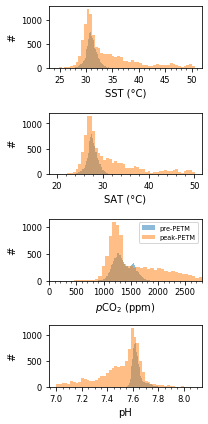

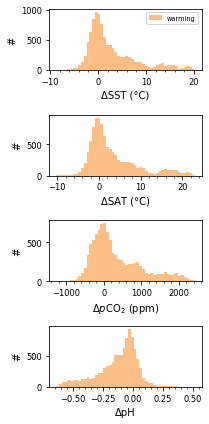

In [6]:

# Calculate mean and std of each variable for each time slice
# plot the ensemble values
#####################    User defined start   #####################
#label_all = ('pre-PETM', 'peak-PETM','post-PETM', 'PETM body')
label_all = ('pre-PETM', 'peak-PETM')
label_all_len = len(label_all)
df = pandas.DataFrame()
print('')
print('DA - Summary of global mean and standard deviation')
print('')
#####################    User defined end     #####################

for locRadi in range(locRadn):
    locRad = local_rad_list[locRadi]
    if locRad is None:
        locRadv = 0 # for filename only
    else:
        locRadv = locRad
        
    for proxy_fraci in range(proxy_fracn):
        proxy_frac = proxy_frac_list[proxy_fraci]
        
        for Rscalei in range(Rscalen):
            Rscale = Rscale_list[Rscalei]
            
            #fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(3, 9))
            fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(3, 6))
            if recon_period_len>1:
                fig2, (ax10, ax11, ax12, ax13) = plt.subplots(nrows=4, figsize=(3, 6))
            params = {'mathtext.default': 'regular' }
            plt.rcParams.update(params)
            #plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':110})
            #fig.suptitle('DA')
            
            # 2d variables
            for Xa2d_vari in range(prior_variable_len):
                
                print(prior_variable_dict[Xa2d_vari])
                datadf = {'field':prior_variable_dict[Xa2d_vari],'mean':[np.nan],'std':[np.nan],
                          '2.5%':[np.nan],'5%':[np.nan],'25%':[np.nan],'median':[np.nan],'75%':[np.nan],'95%':[np.nan],'97.5%':[np.nan],'label':''}
                df2 = pandas.DataFrame(datadf, index=[Xa2d_vari])
                df = pandas.concat([df,df2])
                
                #sst_std_mc = np.std(Xa2d_mean_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,:],axis=0)
                print('  _locR '+str(locRadv)+' proxy_frac '+str(proxy_frac)+' scaled r '+str(Rscale))

                for reconi in range(recon_period_len):
                    
                    meani = np.nanmean(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi])
                    stdi = np.std(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi])
                    perc = np.percentile(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi],np.array([2.5, 5, 25, 50, 75, 95, 97.5]))
                    datadf = {'field':'','mean':[meani],'std':[stdi],
                              '2.5%':[perc[0]],'5%':[perc[1]],'25%':[perc[2]],'median':[perc[3]],'75%':[perc[4]],'95%':[perc[5]],'97.5%':[perc[6]],'label':label_all[reconi]}
                    df2 = pandas.DataFrame(data = datadf, index=[Xa2d_vari])
                    df = pandas.concat([df,df2])
                    print('    {:.3f} ± {:.3f}: {}'.format(meani, stdi, label_all[reconi]))
                    
                    if recon_period_len>1:
                        warmpeak = Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,1]-Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,0]
                        #warmbody = Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,2]-Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,0]
                        warmpeakmean = np.nanmean(warmpeak)
                        warmpeakstd  = np.std(warmpeak)
                        warmperc = np.percentile(warmpeak,np.array([2.5, 5, 25, 50, 75, 95, 97.5]))
                        if recon_period_len>2:
                            coolpeak = Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,2]-Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,1]
                            coolpeakmean = np.nanmean(coolpeak)
                            coolpeakstd  = np.std(coolpeak)
                            coolperc = np.percentile(coolpeak,np.array([2.5, 5, 25, 50, 75, 95, 97.5]))
                        
                if recon_period_len>1:
                    df2 = pandas.DataFrame({'field':'','mean':[warmpeakmean],'std':[warmpeakstd],
                                            '2.5%':[warmperc[0]],'5%':[warmperc[1]],'25%':[warmperc[2]],'median':[warmperc[3]],'75%':[warmperc[4]],'95%':[warmperc[5]],'97.5%':[warmperc[6]],'label':'Peak_warming'}, index=[Xa2d_vari])
                    df = pandas.concat([df,df2])
                    print('    {:.6f} ± {:.6f}: peak warming'.format(warmpeakmean,warmpeakstd))
                    if recon_period_len>2:
                        df3 = pandas.DataFrame({'field':'','mean':[coolpeakmean],'std':[coolpeakstd],
                                                '2.5%':[coolperc[0]],'5%':[coolperc[1]],'25%':[coolperc[2]],'median':[coolperc[3]],'75%':[coolperc[4]],'95%':[coolperc[5]],'97.5%':[coolperc[6]],'label':'Peak_cooling'}, index=[Xa2d_vari])
                        df = pandas.concat([df,df3])
                        print('    {:.6f} ± {:.6f}: peak cooling'.format(coolpeakmean,coolpeakstd))
                
                for reconi in range(recon_period_len):
                    if reconi == 3:
                        continue
                    kwargs = dict(alpha=0.5, bins=50)
                    
                    if Xa2d_vari == 0:
                        ax0.hist(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi], **kwargs, label = label_all[reconi])
                        ax0.set_ylabel('#')
                        ax0.set_xlabel('SST (\u00B0C)')
                        ax0.tick_params(labelsize='small')
                        ax0.xaxis.set_minor_locator(AutoMinorLocator())
                    if Xa2d_vari == 1:
                        ax1.hist(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi], **kwargs, label = label_all[reconi])
                        ax1.set_ylabel('#')
                        ax1.set_xlabel('SAT (\u00B0C)')
                        ax1.tick_params(labelsize='small')
                        ax1.xaxis.set_minor_locator(AutoMinorLocator())
                    if Xa2d_vari == 2:
                        ax2.hist(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi], **kwargs, label = label_all[reconi])
                        ax2.set_ylabel('#')
                        ax2.set_xlabel('$\it{p}$CO$_2$ (ppm)')
                        ax2.set_xlim(0, 2800)
                        ax2.legend(prop={'size': 6.5})  
                        ax2.tick_params(labelsize='small')
                        ax2.xaxis.set_minor_locator(AutoMinorLocator())
                    #if Xa2d_vari == 3:
                    #    ax3.hist(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi], **kwargs, label = label_all[reconi])
                    #    ax3.set_ylabel('Number')
                    #    ax3.set_xlabel('Salinity (PSU)')
                    if Xa2d_vari == 4:
                        ax3.hist(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi], **kwargs, label = label_all[reconi])
                        ax3.set_ylabel('#')
                        ax3.set_xlabel('pH')     
                        ax3.tick_params(labelsize='small')
                        ax3.xaxis.set_minor_locator(AutoMinorLocator())
                    #if Xa2d_vari == 6:
                    #    ax5.hist(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi], **kwargs, label = label_all[reconi])
                    #    ax5.set_ylabel('Number')
                    #    ax5.set_xlabel('$CaCO_3$ (%)')
                fig.tight_layout()
                
                if recon_period_len>1:
                    if Xa2d_vari == 0:                    
                        ax10.hist(warmpeak, **kwargs, color = "#ff7f0e", label = 'warming')
                        if recon_period_len>2:
                            ax10.hist(coolpeak, **kwargs, color = "#2ca02c", label = 'cooling')
                        ax10.set_ylabel('#')
                        ax10.set_xlabel('\u0394SST (\u00B0C)')                        
                        ax10.legend(prop={'size': 6.5});
                        ax10.tick_params(labelsize='small')
                        ax10.xaxis.set_minor_locator(AutoMinorLocator())
                    if Xa2d_vari == 1:
                        ax11.hist(warmpeak, **kwargs, color = "#ff7f0e")
                        if recon_period_len>2:
                            ax11.hist(coolpeak, **kwargs, color = "#2ca02c")
                        ax11.set_ylabel('#')
                        ax11.set_xlabel('\u0394SAT (\u00B0C)')
                        ax11.tick_params(labelsize='small')
                        ax11.xaxis.set_minor_locator(AutoMinorLocator())
                    if Xa2d_vari == 2:
                        ax12.hist(warmpeak, **kwargs, color = "#ff7f0e")
                        if recon_period_len>2:
                            ax12.hist(coolpeak, **kwargs, color = "#2ca02c")
                        ax12.set_ylabel('#')
                        ax12.set_xlabel('\u0394$\it{p}$CO$_2$ (ppm)')
                        ax12.tick_params(labelsize='small')
                        ax12.xaxis.set_minor_locator(AutoMinorLocator())
                    if Xa2d_vari == 4:
                        ax13.hist(warmpeak, **kwargs, color = "#ff7f0e")
                        if recon_period_len>2:
                            ax13.hist(coolpeak, **kwargs, color = "#2ca02c")
                        ax13.set_ylabel('#')
                        ax13.set_xlabel('\u0394pH')
                        ax13.tick_params(labelsize='small')
                        ax13.xaxis.set_minor_locator(AutoMinorLocator())
            fig2.tight_layout()

# print and save excel

print('saved @')
pwd = os.getcwd()
fullname = yml_dict['core']['proj_dir']+'/wrk/'+en+'-'+en2+'.summary.xlsx'
print(fullname)
df.to_excel(fullname)

fig.savefig(yml_dict['core']['proj_dir']+'/wrk/'+en+'-'+en2+'.summary.pdf')
if recon_period_len>1:
    fig2.savefig(yml_dict['core']['proj_dir']+'/wrk/'+en+'-'+en2+'.delta.pdf')

In [3]:
# Calculate mean and std of each variable for each time slice
# plot the ensemble values
#####################    User defined start   #####################
label_all = ('prePETM', 'peakPETM','postPETM', 'PETM_body')
label_all_len = len(label_all)
warmcomp = [0,1]  # ID for petm warming
dat = pandas.DataFrame()
xlist = ('SST (U+2103)')
ylist = ()
print('')
print('DA - Summary of global mean and standard deviation')
print('')
#####################    User defined end     #####################

for locRadi in range(locRadn):
    locRad = local_rad_list[locRadi]
    if locRad is None:
        locRadv = 0 # for filename only
    else:
        locRadv = locRad
        
    for proxy_fraci in range(proxy_fracn):
        proxy_frac = proxy_frac_list[proxy_fraci]
        
        for Rscalei in range(Rscalen):
            Rscale = Rscale_list[Rscalei]
            
            # 2d variables
            for Xa2d_vari in range(prior_variable_len):
                
                print(prior_variable_dict[Xa2d_vari])
                
                df2 = pandas.DataFrame({'field':prior_variable_dict[Xa2d_vari],'mean':[np.nan],'std':[np.nan],'label':'-'}, index=[Xa2d_vari])
                df = pandas.concat([df,df2])
                
                sst_std_mc = np.std(Xa2d_mean_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,:],axis=0)
                print('  _locR '+str(locRadv)+' proxy_frac '+str(proxy_frac)+' scaled r '+str(Rscale))

                for reconi in range(recon_period_len):
                    
                    meani = np.nanmean(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi])
                    stdi = np.std(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi])
                    df2 = pandas.DataFrame({'field':'','mean':[meani],'std':[stdi],'label':label_all[reconi]}, index=[Xa2d_vari])
                    df = pandas.concat([df,df2])
                    print('    {:.3f} ± {:.3f}: {}'.format(meani, stdi, label_all[reconi]))
                    
                    if recon_period_len>2:
                        warmpeak = Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,1]-Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,0]
                        #warmbody = Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,2]-Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,0]
                        coolpeak = Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,1]-Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,2]
                        warmpeakmean = np.nanmean(warmpeak)
                        warmpeakstd = np.std(warmpeak)
                        coolpeakmean = np.nanmean(coolpeak)
                        coolpeakstd = np.std(coolpeak)
                        
                if recon_period_len>2:
                    df2 = pandas.DataFrame({'field':'','mean':[warmpeakmean],'std':[warmpeakstd],'label':'Peak_warming'}, index=[Xa2d_vari])
                    df3 = pandas.DataFrame({'field':'','mean':[coolpeakmean],'std':[coolpeakstd],'label':'Peak_cooling'}, index=[Xa2d_vari])
                    df = pandas.concat([df,df2,df3])
                    print('    {:.6f} ± {:.6f}: peak warming'.format(warmpeakmean,warmpeakstd))
                    print('    {:.6f} ± {:.6f}: peak cooling'.format(coolpeakmean,coolpeakstd))

                plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':110})
                fig = plt.figure()
                for reconi in range(recon_period_len):
                    kwargs = dict(alpha=0.5, bins=60)
                    if prior_variable_dict[Xa2d_vari] in ['atm_pCO2']:
                        #plt.hist(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi]*1e6, **kwargs, label = label_all[reconi])
                        plt.gca().set(xlabel = prior_variable_dict[Xa2d_vari]+ ' (ppm)');
                    else:
                        plt.gca().set(xlabel = prior_variable_dict[Xa2d_vari]);
                    plt.hist(Xa2d_full_np[locRadi,proxy_fraci,Rscalei,:,Xa2d_vari,reconi], **kwargs, label = label_all[reconi])
                    #plt.gca().set(title='Frequency Histogram: locR '+str(locRadv)+' proxy_frac '+str(proxy_frac)+' scaled r '+str(Rscale), ylabel='Frequency');                    
                    if Xa2d_vari == 0:
                        plt.legend();


DA - Summary of global mean and standard deviation

ocn_sur_temp


/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



NameError: name 'Xa2d_mean_np' is not defined

In [5]:
### Purpose of this block
# Prepare data for verification
### Steps
# 1. Prepare matrix for data saving: proxy, prior, posterior; std or not
# 2. calculate and save each Monte Carlo runs

#####################    User defined start   #####################
verbose = True
Typelist = ['d18O','TEX86','MgCa','caco3']
#Typelist = ['caco3']
#Typelist = ['d18O','TEX86','MgCa']
print('DA - Read proxy, prior, and posterior, standardize')
print('')
#####################    User defined end     #####################
locRad = local_rad_list[0]
if locRad is None:
    locRadv = 0 # for filename only
else:
    locRadv = locRad
proxy_frac = proxy_frac_list[0]
Rscale = Rscale_list[0]
filename_short = '_loc_', str(locRadv),'_proxy_frac_', str(proxy_frac),'_Rscale_',str(Rscale),'_MC_0.hdf5'
hdf5name = MC_dir + ''.join(filename_short)
print('Read first hdf5 file {} to get the number of withold datasets.'.format(hdf5name))
sites_eval = pandas.read_hdf(hdf5name, 'sites_eval')
sites_withhold_len  = len(sites_eval)
print(' Site withhold length ： {}'.format(sites_withhold_len))

# Prepare empty matrix for saving the data of proxy, prior, and posterior
ob_stat = np.full((locRadn,proxy_fracn,Rscalen,MCn, recon_period_len*2, sites_withhold_len), np.nan)
xb_stat = np.full((locRadn,proxy_fracn,Rscalen,MCn, 2, sites_withhold_len), np.nan)   # save full prior for withhold data
xa_stat = np.full((locRadn,proxy_fracn,Rscalen,MCn, recon_period_len*2, sites_withhold_len), np.nan)

# Prepare empty matrix for saving the data of proxy, prior, and posterior; standardized
ob_std = np.copy(ob_stat)
xb_std = np.copy(xb_stat)
xa_std = np.copy(xa_stat)

# calculate each Monte Carlo runs
for locRadi in range(locRadn):
    locRad = local_rad_list[locRadi]
    if locRad is None:
        locRadv = 0 # for filename only
    else:
        locRadv = locRad
        
    for proxy_fraci in range(proxy_fracn):
        proxy_frac = proxy_frac_list[proxy_fraci]
        
        for Rscalei in range(Rscalen):
            Rscale = Rscale_list[Rscalei]
            
            for MCi in range(MCn):
            #for MCi in range(1):
                # NetCDF file name
                filename_short = '_loc_', str(locRadv),'_proxy_frac_', str(proxy_frac),'_Rscale_',str(Rscale),'_MC_' + str(MCi)
                nc_filename = MC_dir + ''.join(filename_short) + '.nc'
                hdf5name    = MC_dir + ''.join(filename_short) + '.hdf5'
                print('    {}'.format(nc_filename))
                
                ### Read Proxy ###
                proxies=pandas.read_hdf(hdf5name, 'proxies')
                prior_variable_dict = pandas.read_hdf(hdf5name, 'prior_variable_dict')
                
                if proxy_frac <= 1.0:
                    sites_eval = pandas.read_hdf(hdf5name, 'sites_eval')
                    sites_withhold_len  = len(sites_eval)                    
                    if verbose:
                        print('Site withhold:       {}'.format(sites_eval['Site'].values))
                        print('Proxy        :       {}'.format(sites_eval['Proxy'].values))
                
                proxy_psm_type_dict_df = pandas.read_hdf(hdf5name, 'proxy_psm_type_dict_df')
                proxy_psm_type_dict_list = proxy_psm_type_dict_df[0].values.tolist()

                for j in range(sites_withhold_len):
                    data_psm_type = sites_eval['Proxy'][j]
                    for key, value in proxy_assim2.items():
                        if data_psm_type in value:
                            #print(proxy_psm_type[key])
                            key0 = key
                            psm_required_variable_key = list(yml_dict['psm'][proxy_psm_type[key]]['psm_required_variables'].keys())[0]
                            xb_key = psm_required_variable_key+'_Xb_full'
                            xa_key = psm_required_variable_key+'_Xa_full'
                            #print('xa_key is {}'.format(xa_key))
                            Xb_full_field0 = Dataset(nc_filename).variables[xb_key] #
                            Xb_full_field0 = Xb_full_field0[:,:,:,0].reshape(dum_imax*dum_jmax, nens)                        
                            Xa_full_field0 = Dataset(nc_filename).variables[xa_key]
                        
                    if proxy_psm_type[key0] in ['bayesreg_tex86', 'bayesreg_d18o_pooled', 'cgenie_caco3']:
                        Ye = DeepDA_psm.cal_ye_cgenie(yml_dict,sites_eval,j,Xb_full_field0,proxy_assim2,proxy_psm_type,dum_lon_offset,dum_imax,dum_jmax)
                        #Ye = DeepDA_psm.cal_ye_cgenie(yml_dict,sites_eval,j,Xb0,proxy_assim2,proxy_psm_type,dum_lon_offset,dum_imax,dum_jmax)
                        xb_stat[locRadi][proxy_fraci][Rscalei][MCi][0][j] = np.mean(Ye)
                        xb_stat[locRadi][proxy_fraci][Rscalei][MCi][1][j] = np.var(Ye)
                        #print('Prior Ye is {:.6f}'.format(np.mean(Ye)))
                        for reconi in range(recon_period_len):
                            Xa_reconi = Xa_full_field0[:,:,:,0,reconi].reshape((dum_imax*dum_jmax,nens))
                            Ye = DeepDA_psm.cal_ye_cgenie(yml_dict,sites_eval,j,Xa_reconi,proxy_assim2,proxy_psm_type,dum_lon_offset,dum_imax,dum_jmax)
                            xa_stat[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][j]   = np.mean(Ye)
                            xa_stat[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][j] = np.var(Ye)
                            #print('Analysis Ye is {:.6f}'.format(np.mean(Ye)))

                            #ob_stat[j][reconi*2]   = sites_eval[data_period_id[reconi]][j]
                            ob_stat[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][j] = sites_eval[data_period_id[reconi]][j]
                            if ~np.isnan(sites_eval[data_period_id[reconi]][j]):
                                if proxy_psm_type[key0] in ['bayesreg_tex86']:
                                    if proxy_err_eval in ['proxy_err_psm']:
                                        ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][j] = DeepDA_psm.obs_estimate_r_fixed_tex86(31) + sites_eval[data_period_idstd[reconi]][j] ** 2
                                    else:
                                        ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][j] = DeepDA_psm.obs_estimate_r_fixed_tex86(31)                                        
                                if proxy_psm_type[key0] in ['bayesreg_d18o_pooled']:
                                    if proxy_err_eval in ['proxy_err_psm']:
                                        ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][j] = DeepDA_psm.obs_estimate_r_fixed_d18o(15) + sites_eval[data_period_idstd[reconi]][j] ** 2
                                    else:
                                        ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][j] = DeepDA_psm.obs_estimate_r_fixed_d18o(15)                                        
                                if proxy_psm_type[key0] in ['cgenie_caco3','cgenie_caco3_13c']:
                                    psm_error = yml_dict['psm'][proxy_psm_type[key0]]['psm_error']
                                    if proxy_err_eval in ['proxy_err_psm']:
                                        ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][j] = psm_error + sites_eval[data_period_idstd[reconi]][j] ** 2
                                    else:
                                        ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][j] = psm_error
                                        
                    elif proxy_psm_type[key0] in ['bayesreg_mgca_pooled_bcp', 'bayesreg_mgca_pooled_red']:
                        spp = 'all'
                        cleaningr = np.tile(np.array([1]),nens)
                        cleaningb = np.tile(np.array([0]),nens)
                        if proxy_psm_type[key0] in ['bayesreg_mgca_pooled_red']:
                            clearning_one = cleaningr
                            proxy_explain = 'reductive'
                        elif proxy_psm_type[key0] in ['bayesreg_mgca_pooled_bcp']:
                            clearning_one = cleaningb
                            proxy_explain = 'barker'

                        #print('    Mg/Ca proxy found. Load salinity, pH and omega')
                        with h5py.File(hdf5name, 'r') as f:
                            Xb_sal = f.get('Xb_sal')
                            Xb_omega = f.get('Xb_omega')
                            Xb_ph = f.get('Xb_ph')
                            Ye = DeepDA_psm.cal_ye_cgenie_mgca(yml_dict,sites_eval,j,Xb_full_field0,proxy_psm_type[key0],dum_lon_offset,dum_imax,dum_jmax,Xb_sal,Xb_ph,Xb_omega,geologic_age)
                            #Ye = DeepDA_psm.cal_ye_cgenie_mgca(yml_dict,sites_eval,j,Xb0,proxy_psm_type[key0],dum_lon_offset,dum_imax,dum_jmax,Xb_sal,Xb_ph,Xb_omega,geologic_age)
                            xb_stat[locRadi][proxy_fraci][Rscalei][MCi][0][j] = np.mean(Ye)
                            xb_stat[locRadi][proxy_fraci][Rscalei][MCi][1][j] = np.var(Ye)
                        Xa_sal_full = Dataset(nc_filename).variables['ocn_sur_sal_Xa_full']
                        Xa_ph_full  = Dataset(nc_filename).variables['misc_pH_Xa_full']
                        Xa_omega_full = Dataset(nc_filename).variables['carb_sur_ohm_cal_Xa_full']

                        for reconi in range(recon_period_len):
                            Xa_reconi = Xa_full_field0[:,:,:,0,reconi].reshape((dum_imax*dum_jmax,nens))
                            Xb_sal   =   Xa_sal_full[:,:,:,0,reconi].reshape((dum_imax*dum_jmax,nens))
                            Xb_ph    =    Xa_ph_full[:,:,:,0,reconi].reshape((dum_imax*dum_jmax,nens))
                            Xb_omega = Xa_omega_full[:,:,:,0,reconi].reshape((dum_imax*dum_jmax,nens))

                            Ye = DeepDA_psm.cal_ye_cgenie_mgca(yml_dict,sites_eval,j,Xa_reconi,proxy_psm_type[key0],dum_lon_offset,dum_imax,dum_jmax,Xb_sal,Xb_ph,Xb_omega,geologic_age)
                            xa_stat[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][j]   = np.mean(Ye)
                            xa_stat[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][j] = np.var(Ye)

                            ob_stat[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][j] = sites_eval[data_period_id[reconi]][j]
                            if ~np.isnan(sites_eval[data_period_id[reconi]][j]):
                                ob_err0 = DeepDA_psm.obs_estimate_r_fixed_mgca_pooled((15, 16), clearning_one[0], np.nanmean(Xb_sal), np.nanmean(Xb_ph), np.nanmean(Xb_omega), spp, geologic_age)
                                if proxy_err_eval in ['proxy_err_psm']:
                                    ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][j] = ob_err0 + sites_eval[data_period_idstd[reconi]][j] ** 2
                                else:
                                    ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][j] = ob_err0
                
                # save proxy, prior, and posterior data and then standardized
                
                xb_std[locRadi][proxy_fraci][Rscalei][MCi][1][:] = np.copy(xb_stat[locRadi][proxy_fraci][Rscalei][MCi][1][:])
                # for each time slices
                for reconi in range(recon_period_len):
                    ob_std[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][:] = np.copy(ob_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][:])
                    xa_std[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][:] = np.copy(xa_stat[locRadi][proxy_fraci][Rscalei][MCi][reconi*2+1][:])
                    # for each proxy type
                    id1 = 0
                    for ki in range(len(Typelist)):
                        
                        sites_s = sites_eval[sites_eval.Type == Typelist[ki]]
                        
                        if reconi + MCi == 0:
                            print('# withhold datasets of {}: {}'.format(Typelist[ki], len(sites_s)))
                        id2 = id1 + len(sites_s)
                        
                        # select observations which type is the same
                        ob_s = ob_stat[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][sites_eval.Type == Typelist[ki]]
                        ct_nonnan0 = sum(~np.isnan(ob_s)) # count non nan values
                        #print('  Count non nan values {}'.format(ct_nonnan0 ))
                        if ct_nonnan0 >= 1:
                            print('observation withhold {}'.format(ob_s))
                            ob_s_std = stats.zscore(ob_s, nan_policy = 'omit')
                            ob_std[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][id1:id2] = np.copy(ob_s_std)
                            
                        # select posterior/analysis which type is the same
                        xa_s = xa_stat[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][sites_eval.Type == Typelist[ki]]
                        ct_nonnan1 = sum(~np.isnan(xa_s)) # count non nan values
                        if ct_nonnan1 >= 1:
                            xa_s_std = stats.zscore(xa_s, nan_policy = 'omit')
                            xa_std[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][id1:id2] = np.copy(xa_s_std)
                            
                        if reconi == 0:
                            # select prior/model which type is the same
                            xb_s = xb_stat[locRadi][proxy_fraci][Rscalei][MCi][0][sites_eval.Type == Typelist[ki]]
                            ct_nonnan2 = sum(~np.isnan(xb_s)) # count non nan values
                            if ct_nonnan2 >= 1:
                                xb_s_std = stats.zscore(xb_s, nan_policy = 'omit')
                                xb_std[locRadi][proxy_fraci][Rscalei][MCi][0][id1:id2] = np.copy(xb_s_std)
                                
                        id1 = id2

print('Done.')

DA - Read proxy, prior, and posterior, standardize

Read first hdf5 file /mnt/d/DeepDA/wrk/petmproxy3slices_v0.0.18.csv_petm17_v18_2020824_T_20mc/_loc_0_proxy_frac_0.7_Rscale_1.0_MC_0.hdf5 to get the number of withold datasets.
 Site withhold length ： 5
    /mnt/d/DeepDA/wrk/petmproxy3slices_v0.0.18.csv_petm17_v18_2020824_T_20mc/_loc_0_proxy_frac_0.7_Rscale_1.0_MC_0.nc
Site withhold:       ['302' '1172' 'fur' 'harrell' 'waipara']
Proxy        :       ['tex86' 'tex86' 'tex86' 'tex86' 'tex86']
  Warning. search_tol may be too small. try a larger number + 10
  Warning. search_tol may be too small. try a larger number + 10
# withhold datasets of d18O: 0
# withhold datasets of TEX86: 5
observation withhold [0.608182 0.6555   0.53     0.72619  0.5373  ]
# withhold datasets of MgCa: 0
# withhold datasets of caco3: 0
observation withhold [0.63     0.82     0.77     0.889    0.856915]
    /mnt/d/DeepDA/wrk/petmproxy3slices_v0.0.18.csv_petm17_v18_2020824_T_20mc/_loc_0_proxy_frac_0.7_Rscale_1.0_M

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



  Warning. search_tol may be too small. try a larger number + 10
Traceback (most recent call last):
  File "/mnt/c/Users/mul450/Dropbox/git/deepDA/DeepDA_lib/DeepDA_psm.py", line 300, in cal_ye_cgenie
    prediction = bayspar.predict_tex_analog(prior_1grid, temptype = 'sst', search_tol = search_tol_i, nens=nens_i)
  File "/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/bayspar/predict.py", line 153, in predict_tex_analog
    sys.exit('No analogs were found. Check seatemp or make your search tolerance wider.')
SystemExit: No analogs were found. Check seatemp or make your search tolerance wider.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-df4b91ef5dc8>", line 97, in <module>
    Ye = DeepDA_psm.cal_ye_cge

SystemExit: No analogs were found. Check seatemp or make your search tolerance wider.

/home/mul450/miniconda3/envs/lmr_py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
# show one MC results

validthisblock = 1

if validthisblock> 0:
    print(MCi)
    print('Done. Show first time-slice data of')
    print(' xb_std ')
    print(xb_std[locRadi,proxy_fraci,Rscalei,MCi,0,:])
    print(' and ')
    print('  ')
    print(' xa_std ')
    print(xa_std[locRadi,proxy_fraci,Rscalei,MCi,0,:])
    print(' ob_std ')
    print(ob_std[locRadi,proxy_fraci,Rscalei,MCi,0,:])
    print('  ')
    if validthisblock>1:
        print('2 nd slice peakPETM')
        print(' xa_std ')
        print(xa_std[locRadi,proxy_fraci,Rscalei,MCi,2,:])
        print(' ob_std ')
        print(ob_std[locRadi,proxy_fraci,Rscalei,MCi,2,:])
        print('  ')
        print('  ')

    print('. Show first time-slice data of')
    print(' xb_stat ')
    print(xb_stat[locRadi,proxy_fraci,Rscalei,MCi,0,:])
    print(' and ')
    print('  ')
    print(' xa_stat ')
    print(xa_stat[locRadi,proxy_fraci,Rscalei,MCi,0,:])
    print(' ob_stat ')
    print(ob_stat[locRadi,proxy_fraci,Rscalei,MCi,0,:])
    print('  ')
    if validthisblock>1:
        print('2 nd slice peakPETM')
        print(' xa_stat ')
        print(xa_stat[locRadi,proxy_fraci,Rscalei,MCi,2,:])
        print(' ob_stat ')
        print(ob_stat[locRadi,proxy_fraci,Rscalei,MCi,2,:])
        print('  ')

9
Done. Show first time-slice data of
 xb_std 
[-1.517516 -1.519367  1.113368 -0.87799   0.120794  0.29418   0.293137
  1.047157  1.046236  1.       -1.        0.491767 -1.394197  0.90243 ]
 and 
  
 xa_std 
[-1.521092 -1.520675  1.111916 -0.873045  0.12535   0.293431  0.292193
  1.046473  1.045449  1.       -1.        0.502047 -1.395996  0.893949]
 ob_std 
[-0.937953 -0.220523       nan -0.51634        nan  1.674816       nan
       nan       nan  1.       -1.        0.921301 -1.389845  0.468544]
  
. Show first time-slice data of
 xb_stat 
[ 0.819608 -4.857895 -4.85942  -2.690882 -4.331129  4.315819 -3.508447
  3.466921 -3.365633 -3.366492  0.741219 -2.745419 -2.746177  4.500664]
 and 
  
 xa_stat 
[ 0.825708 -4.963862 -4.963517 -2.786015 -4.427841  4.22961  -3.602036
  3.406064 -3.463011 -3.464035  0.747298 -2.840145 -2.840992  4.399653]
 ob_stat 
[ 0.84429  -3.437143 -3.132308       nan -3.258     4.33167        nan
  3.68267  -2.32698        nan  0.72619        nan       nan  4.20


NSE & RMSE calculation ... 
    raw data used 
    each time slice calculated 
      NSE & RMSE calculation: Done!
  prePETM
    mean of CE   [0.891225 0.87466 ]
    mean of RMSE [0.727305 0.768868]
  peakPETM
    mean of CE   [0.916219 0.92536 ]
    mean of RMSE [0.892566 0.822536]
  NSE & RMSE calculation ... 
    raw data used 
    all time slice together 
      NSE & RMSE calculation: Done!
      mean of CE   [0.916491 0.921931]
      mean of RMSE [0.834985 0.802595]

NSE & RMSE calculation ... 
    standardized data used 
    each time slice calculated 
      NSE & RMSE calculation: Done!
  prePETM
    mean of CE   [0.422671 0.42186 ]
    mean of RMSE [0.713213 0.714148]
  peakPETM
    mean of CE   [0.310559 0.302102]
    mean of RMSE [0.816824 0.822335]
  NSE & RMSE calculation ... 
    standardized data used 
    all time slice together 
      NSE & RMSE calculation: Done!
      mean of CE   [0.381299 0.376201]
      mean of RMSE [0.780362 0.783724]


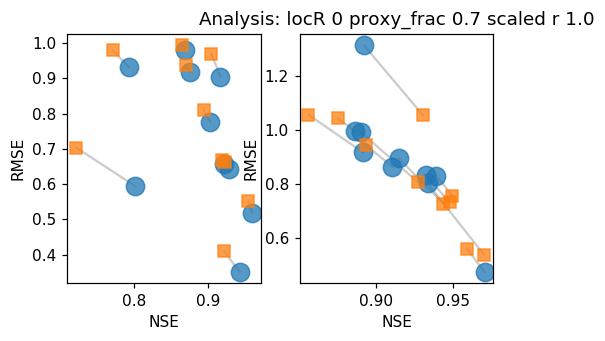

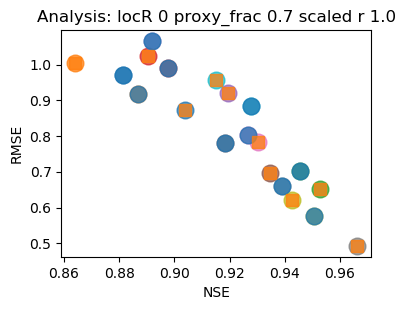

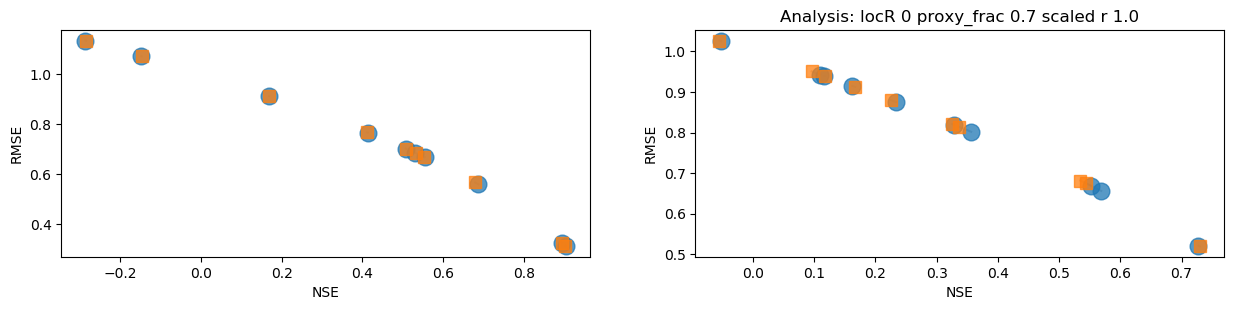

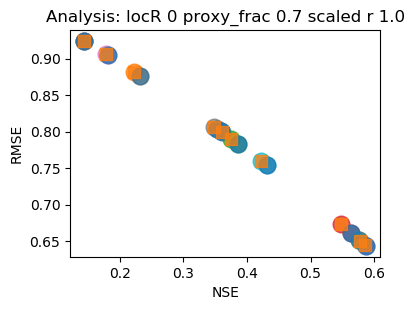

In [5]:
# validataion
# calculate CE and RMSE for each time slices
# plot CE and RMSE

stdtf = [False, True] # True: standardize; False: use raw analysis data
cetf = [False,True] # True: calculate ce in all; False: calculate ce for each time slice
verbose = False

for stdi in range(2):
    for allcei in range(2):
        allce = cetf[allcei]
        AnalysisStd = stdtf[stdi]
        if allcei == 0:
            print('')
            print('NSE & RMSE calculation ... ')
        else:            
            print('  NSE & RMSE calculation ... ')
        if AnalysisStd:
            ob_stat_select = np.copy(ob_std)
            xb_stat_select = np.copy(xb_std)
            xa_stat_select = np.copy(xa_std)
            print('    standardized data used ')
        else:
            ob_stat_select = np.copy(ob_stat)
            xb_stat_select = np.copy(xb_stat)
            xa_stat_select = np.copy(xa_stat)
            print('    raw data used ')

        # calculate NSE & RMSE
        if allce:
            CE_stat = np.full((locRadn,proxy_fracn,Rscalen,MCn,2), np.nan)
            RMSE_stat=np.full((locRadn,proxy_fracn,Rscalen,MCn,2), np.nan)
            print('    all time slice together ')
            CE_all = np.full((locRadn,proxy_fracn,Rscalen,2), np.nan)
            RMSE_all=np.full((locRadn,proxy_fracn,Rscalen,2), np.nan)
        else:
            CE_stat = np.full((locRadn,proxy_fracn,Rscalen,MCn,2,recon_period_len), np.nan)
            RMSE_stat=np.full((locRadn,proxy_fracn,Rscalen,MCn,2,recon_period_len), np.nan)
            print('    each time slice calculated ')
            
        
        
        reconlist = np.arange(0,2*recon_period_len,2)
        # calculate each Monte Carlo runs
        for locRadi in range(locRadn):
            locRad = local_rad_list[locRadi]
            if locRad is None:
                locRadv = 0 # for filename only
            else:
                locRadv = locRad

            for proxy_fraci in range(proxy_fracn):
                proxy_frac = proxy_frac_list[proxy_fraci]

                for Rscalei in range(Rscalen):
                    Rscale = Rscale_list[Rscalei]
                    
                    if allce:
                        dataall     = ob_stat_select[locRadi,proxy_fraci,Rscalei,:,reconlist,:].flatten('F')
                        modelall    = np.matlib.repmat(xb_stat_select[locRadi,proxy_fraci,Rscalei,:,0,:],reconi+1,1).flatten('F')
                        analysisall = xa_stat_select[locRadi,proxy_fraci,Rscalei,:,reconlist,:].flatten('F')
                        CE_all[locRadi,proxy_fraci,Rscalei,0] = DeepDA_psm.CE_NS70(dataall, modelall,1)
                        CE_all[locRadi,proxy_fraci,Rscalei,1] = DeepDA_psm.CE_NS70(dataall, analysisall,1)
                        RMSE_all[locRadi,proxy_fraci,Rscalei,0] = np.sqrt(np.nanmean((modelall - dataall) ** 2))
                        RMSE_all[locRadi,proxy_fraci,Rscalei,1] = np.sqrt(np.nanmean((analysisall - dataall) ** 2))
                        if verbose:
                            filename_short = '      _loc_', str(locRadv),'_proxy_frac_', str(proxy_frac),'_Rscale_',str(Rscale)
                            print('>>{}'.format(filename_short))
                            print('>>  all data     {}'.format(dataall))
                            print('>>  all model    {}'.format(modelall))
                            print('>>  all analysis {}'.format(analysisall))
                            print('>>  Prior    CE: obs vs. xb {}'.format(CE_all[locRadi,proxy_fraci,Rscalei,0]))
                            print('>>  Analysis CE: obs vs. xa {}'.format(CE_all[locRadi,proxy_fraci,Rscalei,1]))
                            print('>>  Prior    RMSE: obs vs. xb {}'.format(RMSE_all[locRadi,proxy_fraci,Rscalei,0]))
                            print('>>  Analysis RMSE: obs vs. xa {}'.format(RMSE_all[locRadi,proxy_fraci,Rscalei,1]))

                    for MCi in range(MCn):
                        filename_short = '      _loc_', str(locRadv),'_proxy_frac_', str(proxy_frac),'_Rscale_',str(Rscale),'_MC_' + str(MCi)
                        data     = ob_stat_select[locRadi,proxy_fraci,Rscalei,MCi,reconlist,:]
                        model    = np.matlib.repmat(xb_stat_select[locRadi,proxy_fraci,Rscalei,MCi,0,:],reconi+1,1)
                        analysis = xa_stat_select[locRadi,proxy_fraci,Rscalei,MCi,reconlist,:]
                        if verbose:
                            print('>>{}'.format(filename_short))
                            print('>>  data     {}'.format(data))
                            print('>>  model    {}'.format(model))
                            print('>>  analysis {}'.format(analysis))
                        if allce:
                            data     = data.flatten('F')
                            model    = model.flatten('F')
                            analysis = analysis.flatten('F')                                           
                            CE_stat[locRadi,proxy_fraci,Rscalei,MCi,0] = DeepDA_psm.CE_NS70(data, model,1)
                            CE_stat[locRadi,proxy_fraci,Rscalei,MCi,1] = DeepDA_psm.CE_NS70(data, analysis,1)                            
                            RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,0] = np.sqrt(np.nanmean((model - data) ** 2))
                            RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,1] = np.sqrt(np.nanmean((analysis - data) ** 2))
                            if verbose:
                                print('>>  Prior    CE: obs vs. xb {}'.format(CE_stat[locRadi,proxy_fraci,Rscalei,MCi,0]))
                                print('>>  Analysis CE: obs vs. xa {}'.format(CE_stat[locRadi,proxy_fraci,Rscalei,MCi,1]))
                                print('>>  Prior    RMSE: obs vs. xb {}'.format(RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,0]))
                                print('>>  Analysis RMSE: obs vs. xa {}'.format(RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,1]))
                        else:
                            CE_stat[locRadi,proxy_fraci,Rscalei,MCi,0,:] = DeepDA_psm.CE_NS70(data, model, 0)
                            CE_stat[locRadi,proxy_fraci,Rscalei,MCi,1,:] = DeepDA_psm.CE_NS70(data, analysis, 0)
                            RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,0,:] = np.sqrt(np.nanmean((model - data) ** 2, axis=1))
                            RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,1,:] = np.sqrt(np.nanmean((analysis - data) ** 2, axis=1))
                            if verbose:
                                print('>>  Prior    CE: obs vs. xb {}'.format(CE_stat[locRadi,proxy_fraci,Rscalei,MCi,0,:]))
                                print('>>  Analysis CE: obs vs. xa {}'.format(CE_stat[locRadi,proxy_fraci,Rscalei,MCi,1,:]))
                                print('>>  Prior    RMSE: obs vs. xb {}'.format(RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,0,:]))
                                print('>>  Analysis RMSE: obs vs. xa {}'.format(RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,1,:]))
        print('      NSE & RMSE calculation: Done!')
        
        # PLot
        # calculate each Monte Carlo runs
        for locRadi in range(locRadn):
            locRad = local_rad_list[locRadi]
            if locRad is None:
                locRadv = 0 # for filename only
            else:
                locRadv = locRad

            for proxy_fraci in range(proxy_fracn):
                proxy_frac = proxy_frac_list[proxy_fraci]

                for Rscalei in range(Rscalen):
                    Rscale = Rscale_list[Rscalei]
                    
                    fig = plt.figure()                    
                    if allce:
                        kwargs = dict(alpha=0.75, marker='o', markersize=12, linestyle='',label = 'Prior')
                        for MCi in range(MCn):
                            plt.plot(CE_stat[locRadi,proxy_fraci,Rscalei,MCi,:],RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,:], **kwargs)
                            
                        kwargs = dict(alpha=0.75, marker='o', markersize=12, linestyle='',label = 'Prior')
                        plt.plot(CE_stat[locRadi,proxy_fraci,Rscalei,:,0],RMSE_stat[locRadi,proxy_fraci,Rscalei,:,0], **kwargs)
                        plt.gca().set(ylabel='RMSE', xlabel = 'NSE');
                        #plt.legend();

                        kwargs = dict(alpha=0.75, marker='s', markersize=8, linestyle='',label = 'Analysis')
                        plt.plot(CE_stat[locRadi,proxy_fraci,Rscalei,:,1],RMSE_stat[locRadi,proxy_fraci,Rscalei,:,1], **kwargs)
                        #plt.legend();
                        
                        plt.gca().set(title='Analysis: locR '+str(locRadv)+' proxy_frac '+str(proxy_frac)+' scaled r '+str(Rscale), ylabel='RMSE', xlabel = 'NSE');

                        CEmean = np.mean(CE_stat[locRadi,proxy_fraci,Rscalei,:,:],axis = 0)
                        RMSEmean=np.mean(RMSE_stat[locRadi,proxy_fraci,Rscalei,:,:],axis = 0)
                        print('      mean of CE   {}'.format(CEmean))
                        print('      mean of RMSE {}'.format(RMSEmean))
                        plt.rcParams.update({'figure.figsize':(15,3), 'figure.dpi':100})
                        
                    else:
                        
                        for reconi in range(recon_period_len):

                            plt.subplot(1, recon_period_len, reconi+1)
                            kwargs = dict(alpha=0.2, linestyle='-', color = 'k')
                            
                            for MCi in range(MCn):
                                plt.plot(CE_stat[locRadi,proxy_fraci,Rscalei,MCi,:,reconi],RMSE_stat[locRadi,proxy_fraci,Rscalei,MCi,:,reconi], **kwargs)

                            kwargs = dict(alpha=0.75, marker='o', markersize=12, linestyle='',label = 'Prior '+label_all[reconi])
                            plt.plot(CE_stat[locRadi,proxy_fraci,Rscalei,:,0,reconi],RMSE_stat[locRadi,proxy_fraci,Rscalei,:,0,reconi], **kwargs)
                            plt.gca().set(ylabel='RMSE', xlabel = 'NSE');
                            #plt.legend();

                            kwargs = dict(alpha=0.75, marker='s', markersize=8, linestyle='',label = 'Analysis '+label_all[reconi])
                            plt.plot(CE_stat[locRadi,proxy_fraci,Rscalei,:,1,reconi],RMSE_stat[locRadi,proxy_fraci,Rscalei,:,1,reconi], **kwargs)
                            #plt.legend();
                            if reconi == 1:
                                plt.gca().set(title='Analysis: locR '+str(locRadv)+' proxy_frac '+str(proxy_frac)+' scaled r '+str(Rscale), ylabel='RMSE', xlabel = 'NSE');

                            print('  {}'.format(label_all[reconi]))
                            CEmean = np.mean(CE_stat[locRadi,proxy_fraci,Rscalei,:,:,reconi],axis = 0)
                            RMSEmean=np.mean(RMSE_stat[locRadi,proxy_fraci,Rscalei,:,:,reconi],axis = 0)
                            print('    mean of CE   {}'.format(CEmean))
                            print('    mean of RMSE {}'.format(RMSEmean))
                            plt.rcParams.update({'figure.figsize':(4,3), 'figure.dpi':100})

No handles with labels found to put in legend.


standardized data used 
  each time slice calculated 


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


raw data used ... 
  each time slice calculated 


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


standardized data used 
  all time slice used 
raw data used ... 
  all time slice used 


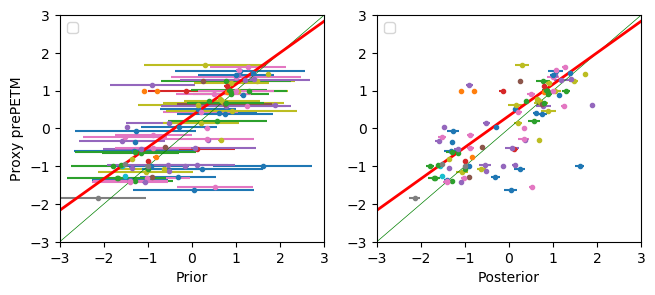

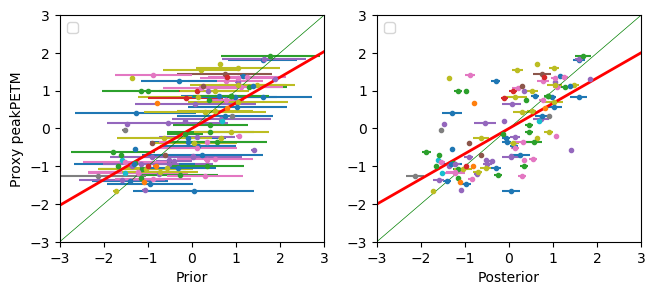

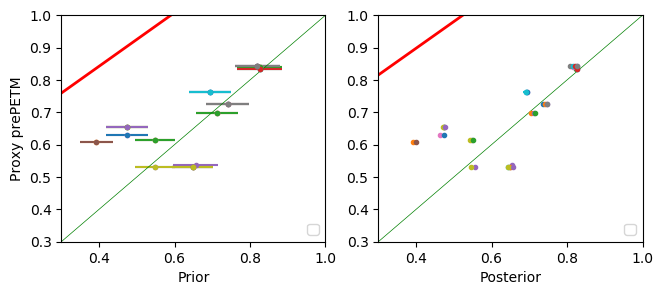

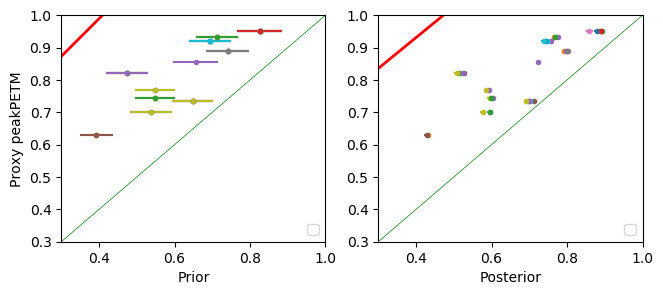

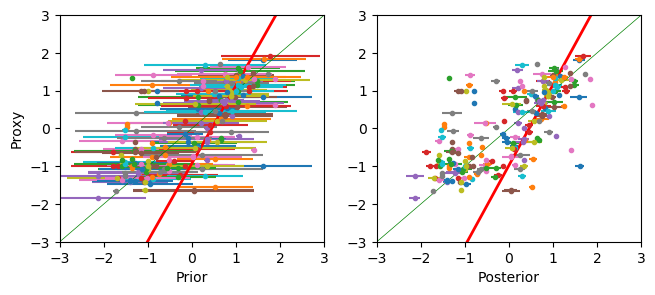

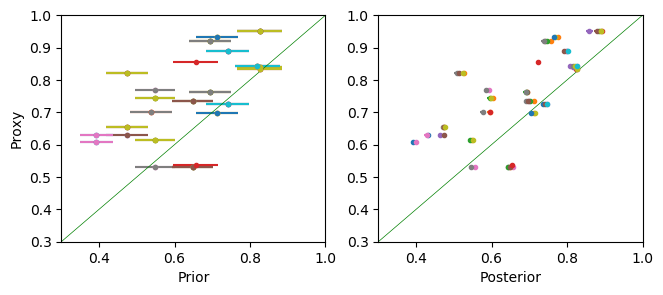

In [6]:
# correlation
# plot data-model comparison before and after DA
# show equation and line

plotn = 1

limoption = 'tex'

if limoption in ['tex']:
    lims = 0.3
    lime = 1.0
if limoption in ['o18']:
    lims = 0.3
    lime = 1.0
if limoption in ['mgca']:
    lims = 0.3
    lime = 6.0

stdtf = [True, False] # True: standardize; False: use raw analysis data
cetf = [False, True] # True: calculate ce in all; False: calculate ce for each time slice

for allcei in range(2):
    for stdi in range(2):
    
        allce = cetf[allcei]
        AnalysisStd = stdtf[stdi]

        if AnalysisStd:
            lim1 = -3
            ob_stat_select = np.copy(ob_std)
            xb_stat_select = np.copy(xb_std)
            xa_stat_select = np.copy(xa_std)
            print('standardized data used ')
            lim2 = -1 * lim1
        else:
            lim1 = lims
            lim2 = lime
            ob_stat_select = np.copy(ob_stat)
            xb_stat_select = np.copy(xb_stat)
            xa_stat_select = np.copy(xa_stat)
            print('raw data used ... ')
       
        if allce:
            print('  all time slice used ')
        else:
            print('  each time slice calculated ')

        if plotn > 0:

            for locRadi in range(locRadn):
                locRad = local_rad_list[locRadi]
                if locRad is None:
                    locRadv = 0 # for filename only
                else:
                    locRadv = locRad

                for proxy_fraci in range(proxy_fracn):
                    proxy_frac = proxy_frac_list[proxy_fraci]

                    for Rscalei in range(Rscalen):
                        Rscale = Rscale_list[Rscalei]
                        
                        if allce:
                            plt.rcParams.update({'figure.figsize':(10,2), 'figure.dpi':100})
                            fig = plt.figure(figsize=(7.5, 3), dpi=100)
                            for kki in range(2):
                                varyall = np.full((recon_period_len*sites_withhold_len), np.nan)
                                varxall = np.full((recon_period_len*sites_withhold_len), np.nan)
                                if kki == 0:
                                    subploti = 121
                                else:
                                    subploti = 122
                                plt.subplot(subploti)
                                plt.plot(np.array([lim1,lim2]), np.array([lim1,lim2]), color='green',linewidth=.5)
                                if kki == 0:
                                    # before DA
                                    plt.xlabel('Prior')
                                    plt.ylabel('Proxy')
                                    
                                    
                                    for ki in range(len(Typelist)):
                                        for reconi in range(recon_period_len):
                                            for MCi in range(MCn):
                                                ob_stat_selecti = ob_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][sites_eval.Type == Typelist[ki]]
                                                y1  = ob_stat_selecti.flatten('F')
                                                ye1 = ob_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][sites_eval.Type == Typelist[ki]].flatten('F')
                                                x1  = xb_stat_select[locRadi][proxy_fraci][Rscalei][MCi][0][sites_eval.Type == Typelist[ki]]
                                                xe1 = xb_stat_select[locRadi][proxy_fraci][Rscalei][MCi][1][sites_eval.Type == Typelist[ki]]
                                                #plt.errorbar(x1, y1, xerr = np.sqrt(xe1), yerr=np.sqrt(ye1), ls = '', label = Typelist[ki])
                                                plt.errorbar(x1, y1, xerr = np.sqrt(xe1), marker='.', ls = '')
                                                # linear regression
                                                id1 = 0
                                                idn = id1+y1.size
                                                varxall[id1:idn] = np.copy(x1)
                                                varyall[id1:idn] = np.copy(y1)
                                                id1 = idn

                                else:
                                    # after DA
                                    plt.xlabel('Posterior')
                                    for ki in range(len(Typelist)):
                                        for reconi in range(recon_period_len):
                                            for MCi in range(MCn):
                                                x1  = xa_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][sites_eval.Type == Typelist[ki]]
                                                xe1 = xa_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][sites_eval.Type == Typelist[ki]]
                                                y1  = ob_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][sites_eval.Type == Typelist[ki]]
                                                ye1 = ob_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][sites_eval.Type == Typelist[ki]]
                                                #plt.errorbar(x1, y1, xerr = np.sqrt(xe1), yerr=np.sqrt(ye1), ls = '', label = Typelist[ki])
                                                plt.errorbar(x1, y1, xerr = np.sqrt(xe1), marker='.', ls = '')

                                                id1 = 0
                                                idn = id1+y1.size
                                                varxall[id1:idn] = np.copy(x1)
                                                varyall[id1:idn] = np.copy(y1)
                                                id1 = idn

                                mask = ~np.isnan(varxall) & ~np.isnan(varyall)
                                slope, intercept, r_value, p_value, std_err = stats.linregress(varxall[mask], varyall[mask])
                                textstr = ('y = {:.3f} * x + {:.3f} \n r = {:.3f}'.format(slope, intercept,r_value))
                                #plt.text(1, 3, textstr, wrap=True)
                                plt.xlim(lim1,lim2)
                                plt.ylim(lim1,lim2)
                                
                                plt.plot(np.array([lim1,lim2]), np.array([lim1*slope+intercept,lim2*slope+intercept]), color='red',linewidth=2)
                                #plt.legend();
                        else:

                            plt.rcParams.update({'figure.figsize':(10,2), 'figure.dpi':100})

                            for reconi in range(recon_period_len):
                                fig = plt.figure(figsize=(7.5, 3), dpi=100)
                                
                                for kki in range(2):
                                    if kki == 0:
                                        subploti = 121
                                    else:
                                        subploti = 122
                                    plt.subplot(subploti)
                                    plt.plot(np.array([lim1,lim2]), np.array([lim1,lim2]), color='green',linewidth=.5)
                                    for MCi in range(MCn):
                                        if kki == 0:
                                            # before DA
                                            plt.xlabel('Prior')
                                            plt.ylabel('Proxy ' + label_all[reconi])
                                            for ki in range(len(Typelist)):
                                                x1  = xb_stat_select[locRadi][proxy_fraci][Rscalei][MCi][0][sites_eval.Type == Typelist[ki]]
                                                xe1 = xb_stat_select[locRadi][proxy_fraci][Rscalei][MCi][1][sites_eval.Type == Typelist[ki]]
                                                y1  = ob_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][sites_eval.Type == Typelist[ki]]
                                                ye1 = ob_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][sites_eval.Type == Typelist[ki]]
                                                #plt.errorbar(x1, y1, xerr = np.sqrt(xe1), yerr=np.sqrt(ye1), ls = '', label = Typelist[ki])
                                                plt.errorbar(x1, y1, xerr = np.sqrt(xe1), marker='.', ls = '')
                                                # linear regression
                                            varx = xb_stat_select[locRadi,proxy_fraci,Rscalei,MCi,0,:]
                                            vary = ob_stat_select[locRadi,proxy_fraci,Rscalei,MCi,2*reconi,:]
                                                #mask = ~np.isnan(varx) & ~np.isnan(vary)
                                                #slope, intercept, r_value, p_value, std_err = stats.linregress(varx[mask], vary[mask])
                                        else:
                                            # after DA
                                            plt.xlabel('Posterior')
                                            for ki in range(len(Typelist)):
                                                x1  = xa_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][sites_eval.Type == Typelist[ki]]
                                                xe1 = xa_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][sites_eval.Type == Typelist[ki]]
                                                y1  = ob_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi][sites_eval.Type == Typelist[ki]]
                                                ye1 = ob_stat_select[locRadi][proxy_fraci][Rscalei][MCi][2*reconi+1][sites_eval.Type == Typelist[ki]]
                                                #plt.errorbar(x1, y1, xerr = np.sqrt(xe1), yerr=np.sqrt(ye1), ls = '', label = Typelist[ki])
                                                plt.errorbar(x1, y1, xerr = np.sqrt(xe1), marker='.', ls = '')
                                                # linear regression
                                            varx = xa_stat_select[locRadi,proxy_fraci,Rscalei,MCi,2*reconi,:]
                                            vary = ob_stat_select[locRadi,proxy_fraci,Rscalei,MCi,2*reconi,:]

                                    mask = ~np.isnan(varx) & ~np.isnan(vary)
                                    slope, intercept, r_value, p_value, std_err = stats.linregress(varx[mask], vary[mask])
                                    textstr = ('y = {:.3f} * x + {:.3f} \n r = {:.3f}'.format(slope, intercept,r_value))
                                    #plt.text(1, 3, textstr, wrap=True)
                                    plt.xlim(lim1,lim2)
                                    plt.ylim(lim1,lim2)
                                    plt.plot(np.array([lim1,lim2]), np.array([lim1*slope+intercept,lim2*slope+intercept]), color='red',linewidth=2)
                                    plt.legend();


In [14]:
# export jupyter notebook as html, for reference
os.system('jupyter nbconvert --to html DeepDA_verify_proxyunit.ipynb')
shutil.move("DeepDA_verify_proxyunit.html", MC_dir+"DeepDA_verify_proxyunit.html")

'/mnt/d/DeepDA/wrk/petmproxy3slices_v0.0.17.csv_petm17_v17_2020721_Mg_pre-peak-PETM_10mc/DeepDA_verify_proxyunit.html'